<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_08/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [175]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [176]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [177]:
# 1.1.1

# Creamos el conjunto de datos de las variables numéricas
df_var = df.drop(columns = ["clase_tipo",	"traccion_tipo",	"transmision_tipo",	"combustible_tipo", "tamano_motor_tipo",	"consumo_tipo", "co2_tipo"])

variables = []

# Sustituimos los valores Nan por el promedio de sus respectivas columnas
for columna, _ in df_var.items():
  variables.append(columna)
  df_var[columna].fillna(df_var[columna].mean(), inplace=True)

# Normalizamos con MinMaxScaler 
scaler = MinMaxScaler()
df_var[variables] = scaler.fit_transform(df_var[variables])
df_var

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


In [178]:
# 1.1.2

# Creamos el conjunto de datos de las variables categóricas y notemos que tenemos valores Nan en la categoría "tamano_motor_tipo"
df_cat = df.drop(columns = ["year",	"desplazamiento",	"cilindros", "co2", "consumo_litros_milla"])
valores_nan = df_cat[df_cat["tamano_motor_tipo"].isnull()] 
valores_nan

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
32352,Coches pequeños,cuatro,Manual,Normal,NaN,muy bajo,muy bajo
32353,Coches pequeños,cuatro,Manual,Normal,NaN,bajo,bajo


In [179]:
# Creamos un dataframe vacío que contendrá los valores numéricos codificados
df_catnum = pd.DataFrame()

# pasamos a variables numéricas con get_dummies
Datos = {}
j = 0
for columna, _ in df_cat.items():
  j=j+1
  df_aux = pd.get_dummies(df_cat[columna])
  columna_nueva = []

  for fila, _ in df_aux.iterrows():
    c = 1

    for col, _ in df_aux.items():
      if df_aux.at[fila,col] == 1:
        columna_nueva.append(c)
      else:
        c=c+1
  if j == 5:  # En la columna nueva destinada a tamano_motor_tipo agregamos el promedio en los valores nan 
    prom = sum(columna_nueva)/len(columna_nueva)
    columna_nueva.insert(32352, prom)
    columna_nueva.insert(32353, prom)
  Datos[columna] = columna_nueva
 
df_catnum = df_catnum.append(pd.DataFrame(data=Datos)) 
df_catnum

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,8,2,1,2,5.0,1,1
1,8,2,1,2,1.0,4,4
2,8,2,1,2,5.0,1,1
3,8,2,1,2,1.0,4,4
4,4,2,1,4,1.0,1,1
...,...,...,...,...,...,...,...
36786,5,2,1,4,4.0,5,5
36787,5,2,1,4,4.0,5,5
36788,5,2,2,4,4.0,5,5
36789,5,2,1,4,4.0,5,5


Explicación de la codificación de las variables categóricas a numéricas: 
- Si tenemos una atributo categórico, al cual llamamos "atributo", este tendra una cierta cantidad de clases, como "clase1_atributo", "clase2_atributo", ... Luego, al aplicar get_dummies a este atributo obtenemos un dataframe donde cada clase es una columna y de acuerdo a la posición de la columna, la clase tomará un número, por ejemplo si la "clase1_atributo" está en la primera columna, su valor será 1 y si "clase2_atributo" está en la segunda columna será 2 y asi sucesivamente. 
- Por otro lado, debido a que no se dice o especifica nada, se asume que los valores numéricos obtenidos en esta parte, no se normalizan

In [180]:
# 1.1.3

# Para finalizar, juntamos ambos dataset
df_procesado = pd.concat([df_var, df_catnum], axis=1, sort=False)
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,0.000000,0.243590,0.142857,0.398014,0.331027,8,2,1,2,5.0,1,1
1,0.000000,0.461538,0.285714,0.527672,0.475113,8,2,1,2,1.0,4,4
2,0.029412,0.243590,0.142857,0.424351,0.360294,8,2,1,2,5.0,1,1
3,0.029412,0.461538,0.285714,0.527672,0.475113,8,2,1,2,1.0,4,4
4,0.088235,0.410256,0.285714,0.424351,0.360294,4,2,1,4,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,5,2,1,4,4.0,5,5
36787,0.941176,0.038462,0.071429,0.174919,0.090196,5,2,1,4,4.0,5,5
36788,0.941176,0.038462,0.071429,0.182174,0.096886,5,2,2,4,4.0,5,5
36789,0.970588,0.038462,0.071429,0.176532,0.090196,5,2,1,4,4.0,5,5


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [181]:
# 1.2.1

# Aplicamos el modelo de kmeans sobre el conjunto de datos, usando  8 clusters.
X = np.array(df_procesado)
Kmeans = KMeans(n_clusters = 8, max_iter = 300) 
Kmeans.fit(X)

KMeans()

In [182]:
# 1.2.2

# Calculamos centroides y clusters
centroides = Kmeans.cluster_centers_ # centros 
clusters = Kmeans.labels_ # clusters

# Asociamos clusters, centroides y datos
df_centroides = pd.DataFrame(centroides)
df_centroides["cluster"] = [1,2,3,4,5,6,7,8]
df_clusters = pd.DataFrame(clusters, columns=["clusters"]) # clusters asociados a cada auto


In [183]:
# 1.2.3

# Mostramos el resumen de las variables
df_procesado["clusters"] = clusters

for i in range(0,8):
  df_aux = df_procesado[df_procesado["clusters"] == i]
  print("Cluster "+str(i+1)+":")
  print("")
  print("Media:")
  print("")
  print(df_aux.mean())
  print("")
  print("Moda:")
  print("")
  print(df_aux.mode())
  print("")
  print("")

Cluster 1:

Media:

year                    0.316164
desplazamiento          0.212299
cilindros               0.152430
co2                     0.325107
consumo_litros_milla    0.248892
clase_tipo              1.607041
traccion_tipo           1.717206
transmision_tipo        1.492334
combustible_tipo        2.363430
tamano_motor_tipo       4.755821
consumo_tipo            2.433277
co2_tipo                2.388416
clusters                0.000000
dtype: float64

Moda:

   year  desplazamiento  cilindros       co2  consumo_litros_milla  \
0   0.0         0.24359   0.142857  0.317749               0.24183   

   clase_tipo  traccion_tipo  transmision_tipo  combustible_tipo  \
0           2              2                 1                 2   

   tamano_motor_tipo  consumo_tipo  co2_tipo  clusters  
0                5.0             2         2         0  


Cluster 2:

Media:

year                    0.570066
desplazamiento          0.169451
cilindros               0.146483
co2            

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


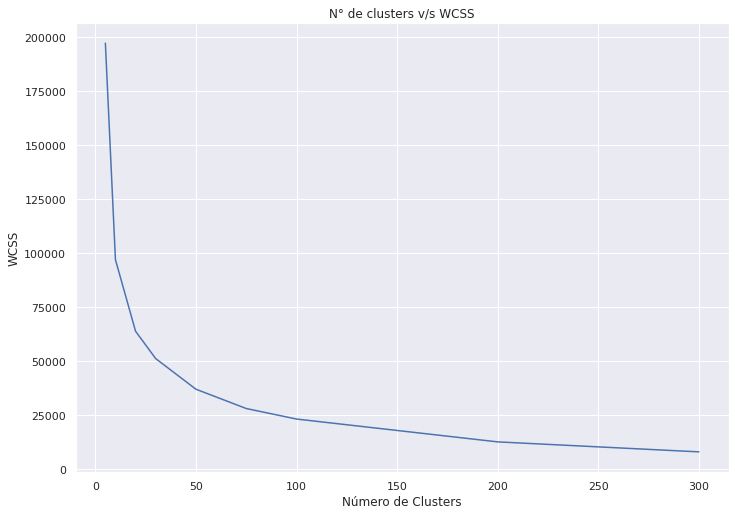

In [184]:
# 1.3

# Calculamos el ajuste Kmeans para cada valor propuesto

valores = [5,10,20,30,50,75,100,200,300]
wcss = []

for k in valores:
  X = np.array(df_procesado)
  Kmeans = KMeans(n_clusters = k, max_iter = 300) 
  Kmeans.fit(X)
  wcss.append(Kmeans.inertia_)

plt.plot(valores, wcss)
plt.title("N° de clusters v/s WCSS")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS") # indica el grado de similitud entre los individuos de cada clusters
plt.show()

Por la regla del codo, la cantidad óptima de clusters son 50, puesto que a partir de este ya no varía tanto el índice de similitud

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [185]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [186]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


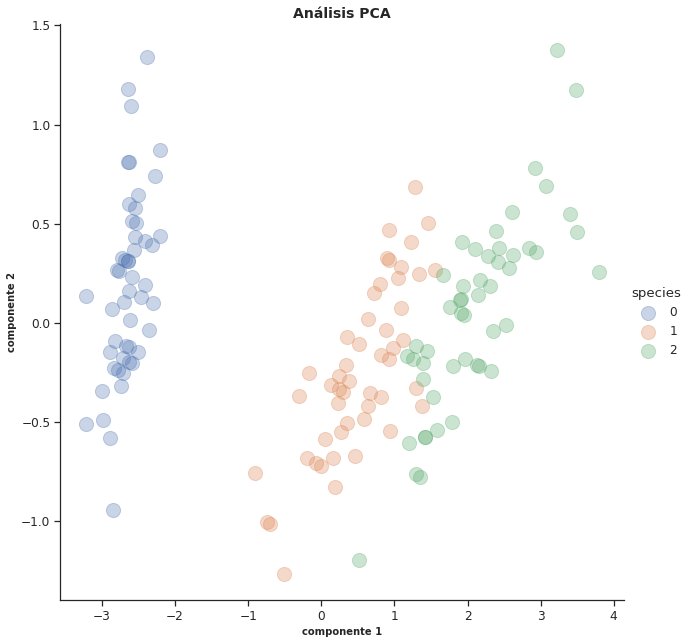

In [187]:
# Ánalisis PCA

scaler = StandardScaler()

# Determinamos los datos a usar
X = iris.drop(columns='species')
y = iris['species']
    
# Determinamos la cantidad de componentes principales a dos
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
iris_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
iris_pca['species'] = y



# Configuramos y creamos el scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x='Score1',
           y='Score2',
           data=iris_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('Análisis PCA', weight='bold').set_fontsize('14')
plt.xlabel('componente 1', weight='bold').set_fontsize('10')
plt.ylabel('componente 2', weight='bold').set_fontsize('10')

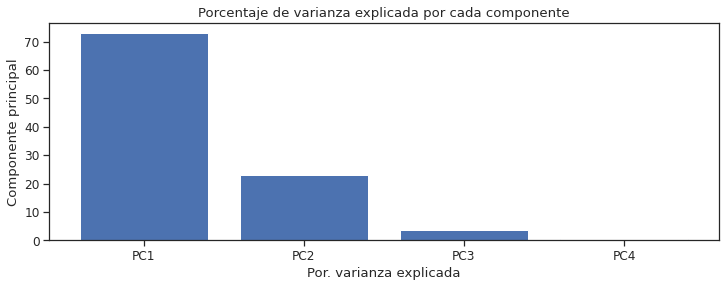

In [188]:
datos = iris.drop(columns='species')
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


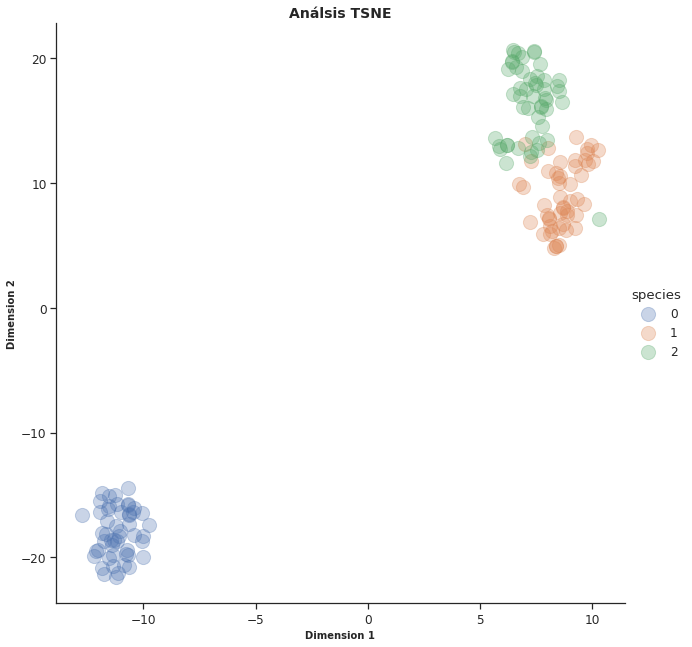

In [190]:
# Tsne

embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
# Determinamos la cantidad de componentes principales a dos
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

# Graficamos
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('Análsis TSNE', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Conclusiones: 
- En PCA se puede notar que los datos distintos son fuertemente separados al momento de ser visualizados, afectando en este sentido a aquellas estructuras que no se agrupan linealmente. Esto puede ser en gran medida, debido a que el TSNE preserva distancias pequeñas por pares, mientras que el PCA preserva las distancias grandes de los pares maximizando la varianza 
